In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-bright')
plt.rcParams["font.family"] = "sans"

In [3]:
df = pd.read_excel('population.xlsx', skiprows=16)

In [4]:
df.rename(columns={df.columns[2]:"Region"}, inplace=True)

In [5]:
pop = df[df['Region'] == 'Egypt'].iloc[:,-21:-6]

In [6]:
df2 = pd.read_csv('data.csv')

In [7]:
CO2 = df2[(df2['Country Code'] == 'EGY') & (df2['Indicator Name'] == 'CO2 emissions (kt)')].iloc[:, -17:-2]

In [8]:
ticks = []
for y in pop.columns:
    if int(y) % 2 == 0:
        ticks.append(y)

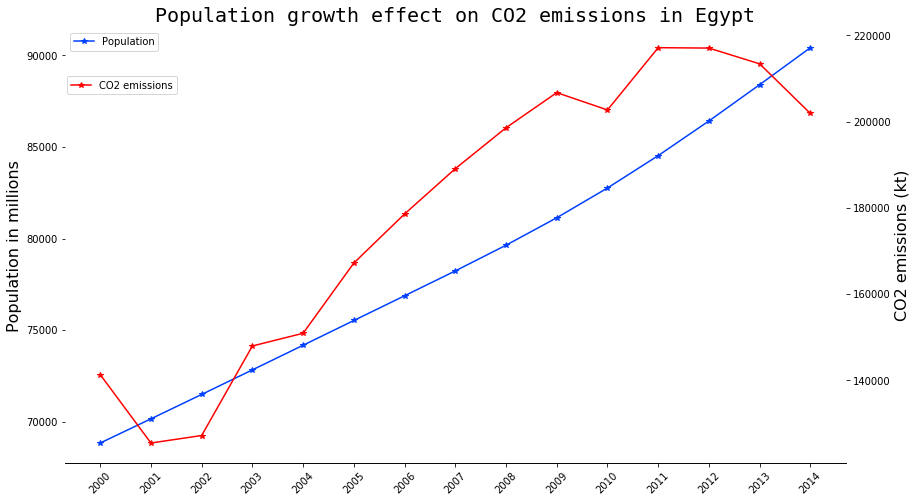

In [10]:
plt.figure(figsize=(14, 8))

plt.plot(pop.columns, pop.values.reshape(-1, 1),'-*')
plt.ylabel('Population in millions', {'size':16})
plt.xticks(ticks, rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.legend(['Population'] )

ax2 = plt.gca().twinx()
ax2.plot(CO2.columns, CO2.values.reshape(-1, 1),'-*r')
plt.ylabel('CO2 emissions (kt)', {'size':16})
plt.title('Population growth effect on CO2 emissions in Egypt',{'size':20, 'fontname':'monospace'})
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

ax2.legend(['CO2 emissions'], loc=1, bbox_to_anchor=(-0.35, 0.4, 0.5, 0.5))
plt.savefig('final', dpi=250)